# Предобработка датасета

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [129]:
df = pd.read_csv("books.csv")
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.;;;
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.;;;
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic;;;
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.;;;
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic;;;


Для начала уберем ненужные столбцы, из которых никак не использовать информацию.

In [130]:
df = df.drop(columns=["bookID", "isbn", "isbn13"])
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.;;;
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.;;;
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic;;;
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.;;;
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic;;;


Посмотрим, нет ли каких-нибудь выбросов в столбцах с рейтингом, количсевтом страниц, количеством оценок и писмьенных отзывов.

In [131]:
print("min ratinng:", df["average_rating"].min())
print("max ratinng:", df["average_rating"].max())
print("min pages:", df["num_pages"].min())
print("max pages:", df["num_pages"].max())
print("min ratings count:", df["ratings_count"].min())
print("max ratings count:", df["ratings_count"].max())
print("min text reviews count:", df["text_reviews_count"].min())
print("max text reviews count:", df["text_reviews_count"].max())


min ratinng: 0.0
max ratinng: 5.0
min pages: 0
max pages: 6576
min ratings count: 0
max ratings count: 4597666
min text reviews count: 0
max text reviews count: 94265


### Видим, что никаких выбросовв столбце с рейтингом не наблюдается. Однако в других столбцах есть некоторые недочеты. 
### Например, в книге не может быть 0 страниц, поэтому стоит удалить данные позиции, так как точно не известно, сколько в них должно быть страниц, и чтобы они не мешались при проверке гипотез.
### Затем, столбец с общим количеством оценок напрямую влияет на столбец с рейтингом книги, так как рейтинг не может появиться у книги, если у нее нет ни одной оценки. Поэтому следует удалить позиции, у которых количесвто оценок равно нулю.

In [132]:
df = df.loc[df["num_pages"] > 0]
df = df.loc[df["ratings_count"] > 0]
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.;;;
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.;;;
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic;;;
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.;;;
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic;;;
...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press;;;
11123,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books;;;
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books;;;
11125,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco;;;


### Рассмотрим теперь, нет ли выбросов с языком, на котором была написана книга.

In [133]:
df["language_code"].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'ita',
       'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla', 'ale'],
      dtype=object)

### Видим, что у английского есть разветвления в виде канадского, американского и британского английского. Это может помешать при проверке гипотез, поэтому стоит просто заменить эти виды английского на обычный английский.

In [134]:
df.loc[df['language_code']=='en-US', 'language_code'] = 'eng'
df.loc[df['language_code']=='en-GB', 'language_code'] = 'eng'
df.loc[df['language_code']=='en-CA', 'language_code'] = 'eng'
df['language_code'].unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', 'enm', 'ger', 'jpn', 'ara',
       'nl', 'zho', 'lat', 'por', 'ita', 'rus', 'msa', 'glg', 'wel',
       'swe', 'nor', 'tur', 'gla', 'ale'], dtype=object)

### Также при проверке значений в столбце с авторами было замечено такое значение ячейки как "NOT A BOOK". Следует, удалить и тсроки с данными значениями в столбце с авторами.

In [135]:
df = df.loc[df["authors"]!='NOT A BOOK']

In [136]:
import missingno as msno

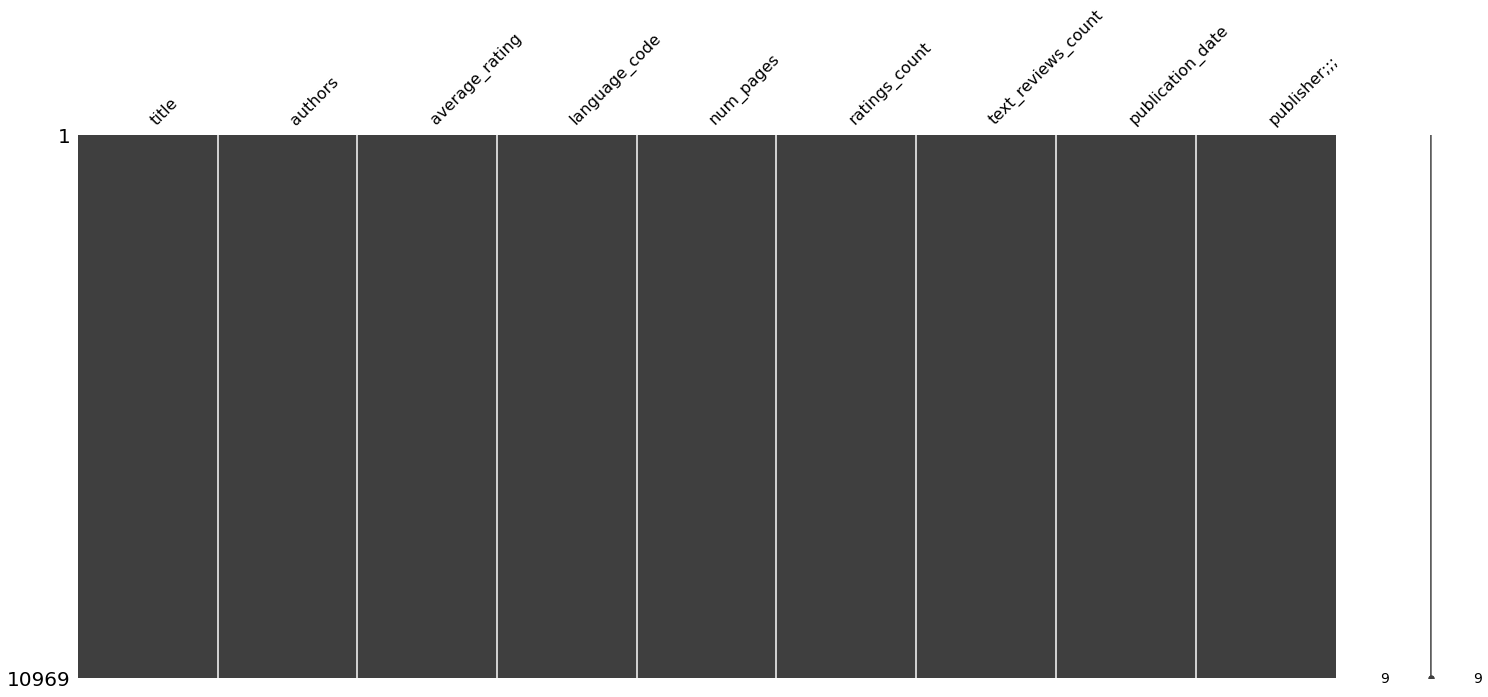

In [137]:
msno.matrix(df);

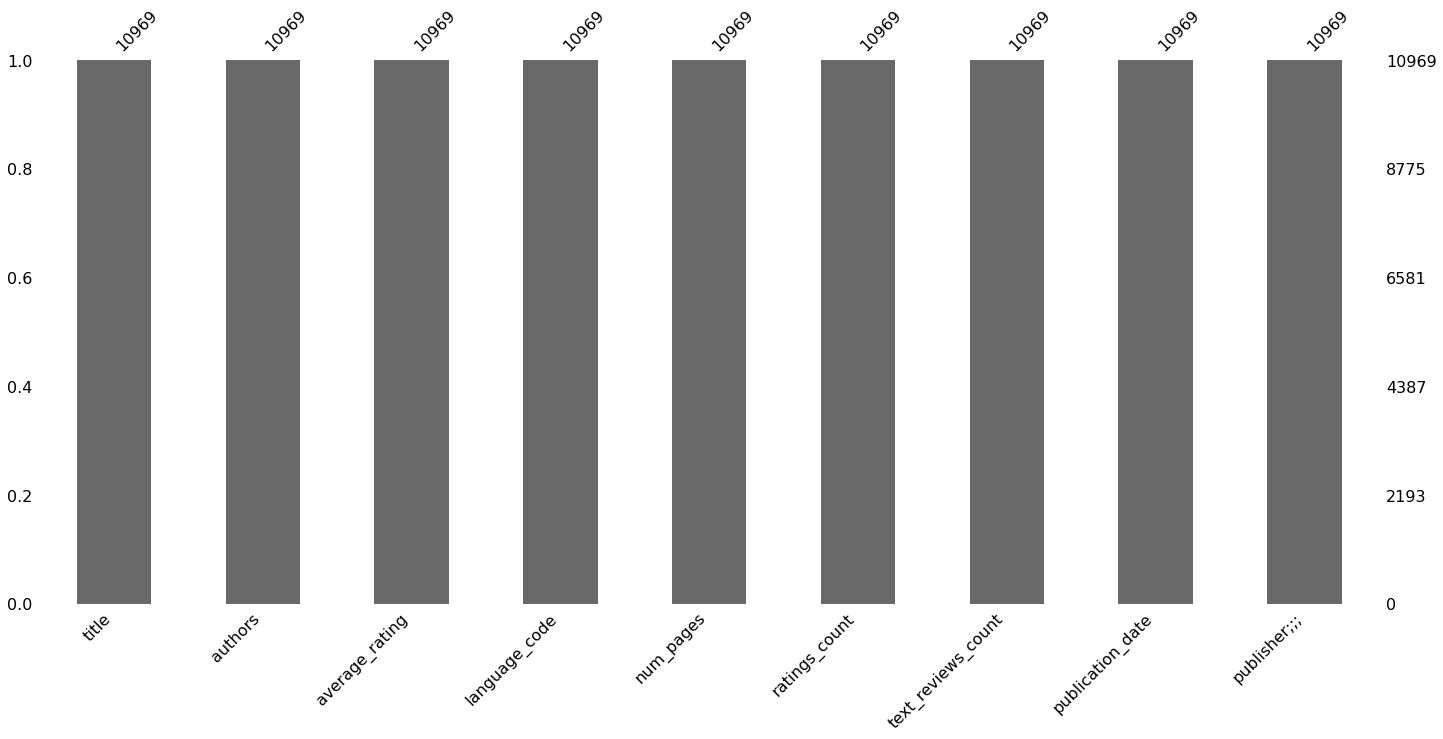

In [138]:
msno.bar(df);

## Теперь можно считать, что датасет готов к проверке гипотез

# ГИПОТЕЗА №1
## Чем позже были опубликованы книги, тем меньше рейтинг у них

In [139]:
df = df.reset_index().drop(columns=["index"])
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher;;;
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.;;;
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.;;;
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic;;;
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.;;;
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic;;;


In [140]:
books_rating = df.copy()
books_rating = books_rating.drop(columns=["title", "authors",
                                            "num_pages", "language_code",
                                            "ratings_count", "text_reviews_count",
                                            "publisher;;;"])
books_rating["publication_date"] = pd.to_datetime(books_rating['publication_date'], errors='coerce')
books_rating['year']= books_rating['publication_date'].dt.year
books_rating = books_rating.drop(columns=["publication_date"])
books_rating

,average_rating,year
0,4.57,2006.0
1,4.49,2004.0
2,4.42,2003.0
3,4.56,2004.0
4,4.78,2004.0
...,...,...
10964,4.06,2004.0
10965,4.08,1988.0
10966,3.96,1993.0
10967,3.72,2007.0


In [141]:
df_1900s = books_rating.loc[(books_rating["year"] >= 1900) & (books_rating["year"] < 1910)]
# df_1900s
total = 0
for a in df_1900s["average_rating"]:
    total = total + a
print(total)
r_1900s = total/df_1900s.shape[0]
r_1900s

3.88


3.88

In [142]:
df_1910s = books_rating.loc[(books_rating["year"] >= 1910) & (books_rating["year"] < 1920)]
# df_1910s
total = 0
for a in df_1910s["average_rating"]:
    total = total + a
print(total)
r_1910s = total/df_1910s.shape[0]
r_1910s

12.23


4.076666666666667

In [143]:
df_1920s = books_rating.loc[(books_rating["year"] >= 1920) & (books_rating["year"] < 1930)]
# df_1920s
total = 0
for a in df_1920s["average_rating"]:
    total = total + a
print(total)
r_1920s = total/df_1920s.shape[0]
r_1920s

28.84


4.12

In [144]:
df_1930s = books_rating.loc[(books_rating["year"] >= 1930) & (books_rating["year"] < 1940)]
# df_1930s
total = 0
for a in df_1930s["average_rating"]:
    total = total + a
print(total)
r_1930s = total/df_1930s.shape[0]
r_1930s

6.38


3.19

In [145]:
df_1940s = books_rating.loc[(books_rating["year"] >= 1940) & (books_rating["year"] < 1950)]
# df_1940s
total = 0
for a in df_1940s["average_rating"]:
    total = total + a
print(total)
r_1940s = total/df_1940s.shape[0]
r_1940s

23.15


3.858333333333333

In [146]:
df_1950s = books_rating.loc[(books_rating["year"] >= 1950) & (books_rating["year"] < 1960)]
# df_1950s
total = 0
for a in df_1950s["average_rating"]:
    total = total + a
print(total)
r_1950s = total/df_1950s.shape[0]
r_1950s

115.73


3.990689655172414

In [147]:
df_1960s = books_rating.loc[(books_rating["year"] >= 1960) & (books_rating["year"] < 1970)]
# df_1960s
total = 0
for a in df_1960s["average_rating"]:
    total = total + a
print(total)
r_1960s = total/df_1960s.shape[0]
r_1960s

284.96999999999997


3.9579166666666663

In [148]:
df_1970s = books_rating.loc[(books_rating["year"] >= 1970) & (books_rating["year"] < 1980)]
# df_1970s
total = 0
for a in df_1970s["average_rating"]:
    total = total + a
print(total)
r_1970s = total/df_1970s.shape[0]
r_1970s

794.0600000000002


3.970300000000001

In [149]:
df_1980s = books_rating.loc[(books_rating["year"] >= 1980) & (books_rating["year"] < 1990)]
# df_1980s
total = 0
for a in df_1980s["average_rating"]:
    total = total + a
print(total)
r_1980s = total/df_1980s.shape[0]
r_1980s

2423.9000000000024


3.9801313628899875

In [150]:
df_1990s = books_rating.loc[(books_rating["year"] >= 1990) & (books_rating["year"] < 2000)]
# df_1990s
total = 0
for a in df_1990s["average_rating"]:
    total = total + a
print(total)
r_1990s = total/df_1990s.shape[0]
r_1990s

9645.309999999998


3.954616646166461

In [151]:
df_2000s = books_rating.loc[(books_rating["year"] >= 2000) & (books_rating["year"] < 2010)]
# df_2000s
total = 0
for a in df_2000s["average_rating"]:
    total = total + a
print(total)
r_2000s = total/df_2000s.shape[0]
r_2000s

29359.760000000093


3.9345698204234916

In [152]:
df_2010s = books_rating.loc[(books_rating["year"] >= 2010) & (books_rating["year"] < 2020)]
# df_2010s
total = 0
for a in df_2010s["average_rating"]:
    total = total + a
print(total)
r_2010s = total/df_2010s.shape[0]
r_2010s

541.0500000000002


3.9783088235294133

In [153]:
df_2020s = books_rating.loc[(books_rating["year"] >= 2020) & (books_rating["year"] < 2030)]
# df_2020s
total = 0
for a in df_2020s["average_rating"]:
    total = total + a
print(total)
r_2020s = total/df_2020s.shape[0]
r_2020s

3.91


3.91

In [154]:
ratings = {'1900s': r_1900s, '1910s': r_1910s, '1920s': r_1920s, '1930s': r_1930s, '1940s': r_1940s, '1950s': r_1950s, '1960s': r_1960s, '1970s': r_1970s, '1980s': r_1980s, '1990s': r_1990s, '2000s': r_2000s, '2010s': r_2010s, '2020s': r_2020s}
rating_data = pd.DataFrame.from_dict(ratings, orient='index', columns=["Average value of ratings"])
# rating_data.plot.bar(color = 'darkturquoise').legend(bbox_to_anchor=(0.51, 0.15));
fig = px.bar(rating_data, labels={'value':'Rating', 'index':'Years'})
fig.update_layout(legend={'title':''})
fig

### Как мы можем наблюдать, дата публикации книги не влияет на то, какие у нее рейтинги. Следовательно, гипотеза не подтвердилась.

# Гипотеза №2
## Чем больше книг написал тот или иной автор, тем более высокие рейтинги у его книг.
### Возьмем по три автора из каждой категории, то есть троих авторов, кто написал свыше 50 книг, троих авторов, которые написали 20-25 книг, и троих авторов, у кого 2-3 книги.

In [155]:
authors_data = {}
for authors in df["authors"]:
    authors_list = authors.split("/")
    for auth in authors_list:
        authors_data[auth] = 0
for authors in df["authors"]:
    authors_list = authors.split("/")
    for auth in authors_list:
        authors_data[auth] += 1
data_authors = pd.DataFrame.from_dict(authors_data, orient='index', columns=['Books'])

In [156]:
data2_3 = data_authors.loc[(data_authors["Books"]<4) & (data_authors["Books"]>1)].sort_values(by='Books')
data2_3 = data2_3.sample(n=3)
data2_3


,Books
Christian Birmingham,2
Robin Wayne Bailey,3
Bill Cosby,3


In [157]:
dict2_3 = data2_3.to_dict('dict2_3')
dict2_3
keys2_3 = list(dict2_3['Books'].keys())

C:\Users\miair\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:1554: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



In [158]:
a1 = df[df['authors'].str.contains(keys2_3[0])]
total = 0
for a in a1["average_rating"]:
    total = total + a
a1_t = total/a1.shape[0]

a2 = df[df['authors'].str.contains(keys2_3[1])]
total = 0
for a in a2["average_rating"]:
    total = total + a
a2_t = total/a2.shape[0]

a3 = df[df['authors'].str.contains(keys2_3[2])]
total = 0
for a in a3["average_rating"]:
    total = total + a
a3_t = total/a3.shape[0]
print(a1_t, a2_t, a3_t)

4.055 3.3966666666666665 3.456666666666667


In [159]:
data20_25 = data_authors.loc[(data_authors["Books"]<26) & (data_authors["Books"]>19)].sort_values(by='Books')
data20_25 = data20_25.sample(n=3)
data20_25

,Books
Maeve Binchy,20
Grant Morrison,24
Albert Camus,21


In [160]:
dict20_25 = data20_25.to_dict('dict20_25')
dict20_25
keys20_25 = list(dict20_25['Books'].keys())

C:\Users\miair\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:1554: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



In [161]:
b1 = df[df['authors'].str.contains(keys20_25[0])]
total = 0
for a in b1["average_rating"]:
    total = total + a
b1_t = total/b1.shape[0]

b2 = df[df['authors'].str.contains(keys20_25[1])]
total = 0
for a in b2["average_rating"]:
    total = total + a
b2_t = total/b2.shape[0]

b3 = df[df['authors'].str.contains(keys20_25[2])]
total = 0
for a in b3["average_rating"]:
    total = total + a
b3_t = total/b3.shape[0]
print(b1_t, b2_t, b3_t)

3.8419999999999996 3.950416666666667 4.03952380952381


In [162]:
data50 = data_authors.loc[data_authors["Books"]>49].sort_values(by='Books')
data50 = data50.sample(n=3)
data50

,Books
William Shakespeare,93
J.R.R. Tolkien,54
Stephen King,96


In [163]:
dict50 = data50.to_dict('dict50')
dict50
keys50 = list(dict50['Books'].keys())

C:\Users\miair\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:1554: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



In [164]:
c1 = df[df['authors'].str.contains(keys50[0])]
total = 0
for a in c1["average_rating"]:
    total = total + a
c1_t = total/c1.shape[0]

c2 = df[df['authors'].str.contains(keys50[1])]
total = 0
for a in c2["average_rating"]:
    total = total + a
c2_t = total/c2.shape[0]

c3 = df[df['authors'].str.contains(keys50[2])]
total = 0
for a in c3["average_rating"]:
    total = total + a
c3_t = total/c3.shape[0]
print(c1_t, c2_t, c3_t)

3.9322580645161294 4.218518518518518 4.0071875


In [165]:
dict_all = {keys2_3[0]:{'2-3 books': a1_t}, keys2_3[1]:{'2-3 books': a2_t}, keys2_3[2]: {'2-3 books': a3_t}, keys20_25[0]:{'20-25 books': b1_t}, keys20_25[1]:{'20-25 books': b2_t}, keys20_25[2]:{'20-25 books': b3_t}, keys50[0]:{'50 and more books': c1_t}, keys50[1]:{'50 and more books': c2_t}, keys50[2]:{'50 and more books': c3_t}}

authors_data = pd.DataFrame.from_dict(dict_all, orient='index')
# authors_data.plot.bar(color = 'darkturquoise').legend(bbox_to_anchor=(1.5, 0.15));
# authors_data.plot.bar(color=["darkturquoise", "darkorange", "darkorchid"], legend=True, width=1, figsize=(10,6)).legend(bbox_to_anchor=(1, 1));

In [166]:
fig = px.bar(authors_data, labels={'value':'Rating', 'index':'Writers'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


### Из графика видно, что рейтинги у всех авторов примерно похожие, однако все они написали различное количество книг. Следовательно, гипотеза опровергнута

# Гипотеза №3
## Чем длиннее название книги, тем меньше у нее рейтинги

In [167]:
df_3 = df.copy()
df_3 = df_3.drop(columns=['language_code', 'authors', 'num_pages',
                            'ratings_count', 'text_reviews_count',
                            'publication_date', 'publisher;;;'])
df_3["words"] = df_3.apply(lambda row: row.title.count(" ") + 1, axis = 1)
df_3

,title,average_rating,words
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,10
1,Harry Potter and the Order of the Phoenix (Har...,4.49,12
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,11
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,11
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,11
...,...,...,...
10964,Expelled from Eden: A William T. Vollmann Reader,4.06,8
10965,You Bright and Risen Angels,4.08,5
10966,The Ice-Shirt (Seven Dreams #1),3.96,5
10967,Poor People,3.72,2


In [168]:
rating_by_words = df_3.drop(columns=['title']).sort_values(by=['words'])
rating_by_words

,average_rating,words
4885,3.87,1
755,3.42,1
3201,3.66,1
6183,3.54,1
759,4.11,1
...,...,...
6065,4.10,36
7084,3.45,36
4609,4.01,36
9641,3.58,43


In [169]:
words_data = {}
for word in rating_by_words["words"]:
    words_data[word] = 0
words_data

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 35: 0,
 36: 0,
 43: 0,
 49: 0}

In [170]:
dict1 = {}
dict2 = {}
for i in words_data:
    dict1[i] = 0
    dict2[i] = 0
for i in words_data:
    df_extra_3 = rating_by_words.loc[rating_by_words["words"] == i]
    total = 0
    for j in df_extra_3["average_rating"]:
        total = total + j
    dict2[i] = df_extra_3.shape[0]
    dict1[i] = total/dict2[i]
dict1

{1: 3.8404841402337255,
 2: 3.8707878315132644,
 3: 3.9012576219512236,
 4: 3.9268903993203086,
 5: 3.945326547921974,
 6: 3.9651930501930517,
 7: 3.9766447368421054,
 8: 3.967210460772102,
 9: 3.9973784977908715,
 10: 4.008187250996017,
 11: 4.003833780160859,
 12: 4.009961389961391,
 13: 3.977658536585368,
 14: 3.931149425287356,
 15: 4.00701754385965,
 16: 4.042023809523811,
 17: 4.021891891891891,
 18: 4.001428571428571,
 19: 4.096666666666668,
 20: 3.948571428571429,
 21: 4.026521739130435,
 22: 4.023999999999999,
 23: 3.9926666666666666,
 24: 4.031111111111111,
 25: 4.164285714285715,
 26: 3.11,
 27: 4.0025,
 28: 4.02,
 29: 4.236666666666666,
 30: 3.72,
 31: 4.61,
 35: 3.925,
 36: 3.853333333333333,
 43: 3.58,
 49: 4.0}

In [171]:
rating_by_words = pd.DataFrame.from_dict(data=dict1, orient='index', columns=['Rating'])
rating_by_words['Words'] = rating_by_words.index
fig = px.scatter(rating_by_words, x="Words", y="Rating", trendline='lowess')
fig.update_traces(line_color='darkorange')
fig

# Гипотеза №4
## Чем раньше была опубликована книга, тем больше у нее отзывов


In [172]:
df_4 = df.copy()
df_4 = df_4.drop(columns=['language_code', 'authors', 'num_pages',
                            'average_rating', 'text_reviews_count',
                            'title', 'publisher;;;'])
df_4["publication_date"] = pd.to_datetime(df_4['publication_date'], errors='coerce')
df_4['year']= df_4['publication_date'].dt.year
df_4 = df_4.drop(columns=['publication_date'])
df_4

,ratings_count,year
0,2095690,2006.0
1,2153167,2004.0
2,6333,2003.0
3,2339585,2004.0
4,41428,2004.0
...,...,...
10964,156,2004.0
10965,783,1988.0
10966,820,1993.0
10967,769,2007.0


In [173]:
df_1900s = df_4.loc[(df_4["year"] >= 1900) & (df_4["year"] < 1910)]
total = 0
for a in df_1900s["ratings_count"]:
    total = total + a
print(total)
rc_1900s = total/df_1900s.shape[0]
rc_1900s

332


332.0

In [174]:
df_1910s = df_4.loc[(df_4["year"] >= 1910) & (df_4["year"] < 1920)]
total = 0
for a in df_1910s["ratings_count"]:
    total = total + a
print(total)
rc_1910s = total/df_1910s.shape[0]
rc_1910s

406


135.33333333333334

In [175]:
df_1920s = df_4.loc[(df_4["year"] >= 1920) & (df_4["year"] < 1930)]
total = 0
for a in df_1920s["ratings_count"]:
    total = total + a
print(total)
rc_1920s = total/df_1920s.shape[0]
rc_1920s

470


67.14285714285714

In [176]:
df_1930s = df_4.loc[(df_4["year"] >= 1930) & (df_4["year"] < 1940)]
total = 0
for a in df_1930s["ratings_count"]:
    total = total + a
print(total)
rc_1930s = total/df_1930s.shape[0]
rc_1930s
df_1930s

19


,ratings_count,year
3324,15,1935.0
10043,4,1931.0


In [177]:
df_1940s = df_4.loc[(df_4["year"] >= 1940) & (df_4["year"] < 1950)]
total = 0
for a in df_1940s["ratings_count"]:
    total = total + a
print(total)
rc_1940s = total/df_1940s.shape[0]
rc_1940s

6958


1159.6666666666667

In [178]:
df_1950s = df_4.loc[(df_4["year"] >= 1950) & (df_4["year"] < 1960)]
total = 0
for a in df_1950s["ratings_count"]:
    total = total + a
print(total)
rc_1950s = total/df_1950s.shape[0]
rc_1950s

289382


9978.689655172413

In [179]:
df_1960s = df_4.loc[(df_4["year"] >= 1960) & (df_4["year"] < 1970)]
total = 0
for a in df_1960s["ratings_count"]:
    total = total + a
print(total)
rc_1960s = total/df_1960s.shape[0]
rc_1960s

87789


1219.2916666666667

In [180]:
df_1970s = df_4.loc[(df_4["year"] >= 1970) & (df_4["year"] < 1980)]
total = 0
for a in df_1970s["ratings_count"]:
    total = total + a
print(total)
rc_1970s = total/df_1970s.shape[0]
rc_1970s

319312


1596.56

In [181]:
df_1980s = df_4.loc[(df_4["year"] >= 1980) & (df_4["year"] < 1990)]
total = 0
for a in df_1980s["ratings_count"]:
    total = total + a
print(total)
rc_1980s = total/df_1980s.shape[0]
rc_1980s

5104270


8381.395730706075

In [182]:
df_1990s = df_4.loc[(df_4["year"] >= 1990) & (df_4["year"] < 2000)]
total = 0
for a in df_1990s["ratings_count"]:
    total = total + a
print(total)
rc_1990s = total/df_1990s.shape[0]
rc_1990s

30177611


12372.944239442395

In [183]:
df_2000s = df_4.loc[(df_4["year"] >= 2000) & (df_4["year"] < 2010)]
total = 0
for a in df_2000s["ratings_count"]:
    total = total + a
print(total)
rc_2000s = total/df_2000s.shape[0]
rc_2000s

160850516


21555.95229161083

In [184]:
df_2010s = df_4.loc[(df_4["year"] >= 2010) & (df_4["year"] < 2020)]
total = 0
for a in df_2010s["ratings_count"]:
    total = total + a
print(total)
rc_2010s = total/df_2010s.shape[0]
rc_2010s

2666668


19607.852941176472

In [185]:
df_2020s = df_4.loc[(df_4["year"] >= 2020) & (df_4["year"] < 2030)]
total = 0
for a in df_2020s["ratings_count"]:
    total = total + a
print(total)
rc_2020s = total/df_2020s.shape[0]
rc_2020s

35275


35275.0

In [186]:
counts = {'1900s': rc_1900s, '1910s': rc_1910s, '1920s': rc_1920s, '1930s': rc_1930s, '1940s': rc_1940s, '1950s': rc_1950s, '1960s': rc_1960s, '1970s': rc_1970s, '1980s': rc_1980s, '1990s': rc_1990s, '2000s': rc_2000s, '2010s': rc_2010s, '2020s': rc_2020s}
rating_data = pd.DataFrame.from_dict(counts, orient='index', columns=["Average amount of ratings"])
# rating_data.plot.bar(color = 'darkturquoise').legend(bbox_to_anchor=(0.51, 0.15));
fig = px.bar(rating_data, labels={'value':'Ratings', 'index':'Years'})
fig.update_layout(legend={'title':''})
fig

# Гипотеза №5
## Чем больше больше письменных отзывов, тем больше общее количество оценок

In [187]:
df_5 = df.copy()
df_5 = df_5.drop(columns=['language_code','title', 'authors', 'num_pages',
                            'publication_date','average_rating', 'publisher;;;'])
df_5 = df_5.rename(columns={"ratings_count": "All ratings", "text_reviews_count": "Text reviews"})
df_5 = df_5.sort_values(by="Text reviews")
df_5 = df_5.loc[df_5["Text reviews"] < 60000]
df_5

,All ratings,Text reviews
2293,4,0
7314,49,0
2022,13,0
4861,6,0
3498,1,0
...,...,...
5346,1362264,47620
7206,1766725,47951
10552,1260027,52759
282,1631221,55843


In [188]:
fig = px.scatter(df_5, x="Text reviews", y="All ratings", trendline="ols")
fig.update_traces(line_color='darkorange')